In [222]:
import math
import warnings  
from tqdm import tqdm
import time
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [223]:
lis = ['data', 'vis', 'sub']
for i in lis:
    if os.path.isdir(i):
        print("%-5s目錄存在，不建立。"%i)
    else:
        os.makedirs(i)

data 目錄存在，不建立。
vis  目錄存在，不建立。
sub  目錄存在，不建立。


In [224]:
filename = './data/train.csv'
df = pd.read_csv(filename)

test_filename = './data/test.csv'
test = pd.read_csv(test_filename)

## Note
- y = LEVEL
- 文字: Station, County, Location
- 有nan

In [225]:
df.columns

Index(['Station', 'Season', 'County', 'Location', 'Lat', 'Lon', '縣市', '海岸段',
       'Region', 'Seat', 'Shore shape', 'Substrate type', '1暴露岩岸', '2暴露人造結構物',
       '3暴露岩盤', '4沙灘', '5砂礫混合灘', '6礫石灘', '7開闊潮間帶', '8遮蔽岩岸', '9遮蔽潮間帶', '10遮蔽濕地',
       'Plastic bottle container', 'Disposable cup / straw / tableware',
       'Plastic bag', 'Foam material', 'Float', 'Fishing nets and ropes',
       'Fishing equipment', 'Cigarette and lighter', 'Glass jar', 'Metal',
       'Paper', 'Others', 'LEVEL'],
      dtype='object')

In [226]:
df.columns[df.isna().any()]

Index(['1暴露岩岸', '2暴露人造結構物', '3暴露岩盤', '4沙灘', '5砂礫混合灘', '6礫石灘', '7開闊潮間帶',
       '8遮蔽岩岸', '9遮蔽潮間帶', '10遮蔽濕地'],
      dtype='object')

In [227]:
print(len(df))
print(len(df[df.isna().T.any()]))

319
76


In [228]:
a = df[df.isna().T.any()]
a.loc[:,a.isna().any()]

# 所有包含缺失值的資料

,1暴露岩岸,2暴露人造結構物,3暴露岩盤,4沙灘,5砂礫混合灘,6礫石灘,7開闊潮間帶,8遮蔽岩岸,9遮蔽潮間帶,10遮蔽濕地
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
a['Season'].unique()

# 發現都出現在Season = 4的時候 可能冬天沒去看?

array([4])

In [230]:
df.loc[:,df.isna().any()]

,1暴露岩岸,2暴露人造結構物,3暴露岩盤,4沙灘,5砂礫混合灘,6礫石灘,7開闊潮間帶,8遮蔽岩岸,9遮蔽潮間帶,10遮蔽濕地
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 把Season 4的部分用眾數補起來

In [231]:
df_copy = df.copy()
nan_col = df_copy.columns[df_copy.isna().any()]

lis = df_copy['Station'].unique()
print(lis)
for i in lis:
    cond = df_copy['Station'] == i
    
    df_copy.loc[cond, nan_col] = df_copy.loc[cond, nan_col].fillna(0, axis = 0)
    df_copy.loc[cond, nan_col] = df_copy.loc[cond, nan_col].mode().values[0]

['E02' 'E03' 'E05' 'E06' 'E08' 'E09' 'HL02' 'HL03' 'HL05' 'HL06' 'HL08'
 'HL09' 'HL11' 'HL12' 'M01' 'M02' 'M04' 'M05' 'M07' 'M08' 'M10' 'M11'
 'M13' 'M14' 'M16' 'M17' 'M19' 'M20' 'M22' 'M23' 'N01' 'N02' 'N04' 'N05'
 'N07' 'N08' 'N10' 'N11' 'N13' 'N14' 'N16' 'N17' 'N19' 'N20' 'N22' 'N23'
 'SE03' 'SE04' 'SE06' 'SE07' 'SE09' 'SE10' 'SE12' 'SE13' 'SE15' 'SE16'
 'SE18' 'SE19' 'SE21' 'SE22' 'SE24' 'SW01' 'SW03' 'SW04' 'SW06' 'SW07'
 'SW09' 'SW10' 'SW12' 'SW13' 'SW15' 'SW16' 'SW18' 'SW19' 'SW21' 'SW22'
 'SW24' 'SW25' 'TT02' 'TT03']


## drop column

In [232]:
df_copy.pop('County')
df_copy.pop('Station')
df_copy.pop('Location')

0              大溪
1              大溪
2              大溪
3              大溪
4              頭城
          ...    
314            長光
315           白桑安
316    白桑安/長濱觀景平台
317    白桑安/長濱觀景平台
318            寜埔
Name: Location, Length: 319, dtype: object

## 有文字的用label enc 換掉
Station, County, Location

In [233]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

# # lis = ['Station', 'County', 'Location']
# lis = list(df.dtypes[df.dtypes == 'object'].index)

# labelEnc_dict = dict() 
# for i in lis:
#     labelEnc_dict[i] = preprocessing.LabelEncoder()
#     labelEnc_dict[i].fit(df_copy[i])
#     df_copy.loc[:, i] = labelEnc_dict[i].transform(df_copy[i])
# df_copy

In [234]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from xgboost import XGBRegressor
from sklearn.svm import SVR

def xgb_model(epochs, objective, booster, max_depth):
    model = XGBRegressor(n_estimators = epochs,
                         max_depth = max_depth,
                         objective = objective,
                         tree_method = 'gpu_hist',
                         booster = booster,
                         verbosity = 1)
    return model

def lr_curve(results, ylabel, title):
    keys = list(results.keys())
    item = list(results[keys[0]].keys())[0]
    epochs = len(results[keys[0]][item])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(x_axis, results["validation_0"][item], label="Train")
    ax.plot(x_axis, results["validation_1"][item], label="Test")
    ax.legend()
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# def eva_metric(y_true, y_pred):
#     dic = {
#         'f1_score':f1_score,
#        'confusion_matrix': confusion_matrix,
#        'multilabel_confusion_matrix': multilabel_confusion_matrix}
    
#     r2 = []
#     eval_res = {}
#     for i in dic.keys():
#         if i == 'f1_score':
# #             r2.append(score)
#             score = dic[i](y_true, y_pred, average = 'macro')
#         else:
#             score = dic[i](y_true, y_pred)
# #         print(i, score)
#         eval_res[i] = score

#     return eval_res

In [235]:
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, average_precision_score, multilabel_confusion_matrix, confusion_matrix

def confusion_matrix_eval(y_true, y_pred, classes):
    eva_result = dict()
    eva_result['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    eva_result['multilabel_confusion_matrix'] = multilabel_confusion_matrix(y_true, y_pred, labels=range(classes))
    
    sns.heatmap(eva_result['confusion_matrix'], annot=True)
    plt.title('樣本總數: '+str(np.sum(eva_result['confusion_matrix'])))
    plt.show()

    # 各個類別的混淆矩陣
    plt.figure(12, figsize=(28,15))
    num = len(eva_result['multilabel_confusion_matrix'])
#     print(eva_result['multilabel_confusion_matrix'])
    positive = np.unique(y_true, return_counts=True)[1]
    for tmp in range(1, num+1):
        plt.subplot(3, (num//2), tmp)
        a = np.array(eva_result['multilabel_confusion_matrix'][tmp-1])

        sns.heatmap(a, annot=True)
        plt.title('樣本總數: '+str(np.sum(a))+' 正樣本占比: '+'%d / %d' % (positive[tmp-1], np.sum(a)))
    plt.show()


In [236]:
def eva_metric(y_true, y_pred):
    dic = {'mse':mean_squared_error,
       'mae': mean_absolute_error,
       'r2_score': r2_score}
    
    r2 = []
    eval_res = {}
    for i in dic.keys():
        score = dic[i](y_true, y_pred)
#         print(i, score)
        eval_res[i] = score
        if i == 'r2_score':
            r2.append(score)
    return eval_res


svr_rbf
train svm with svr_rbf
{'mse': 3.150943396226415, 'mae': 1.3396226415094339, 'r2_score': 0.47026169706582077}


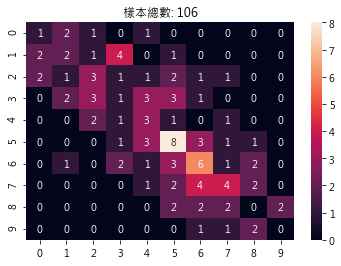

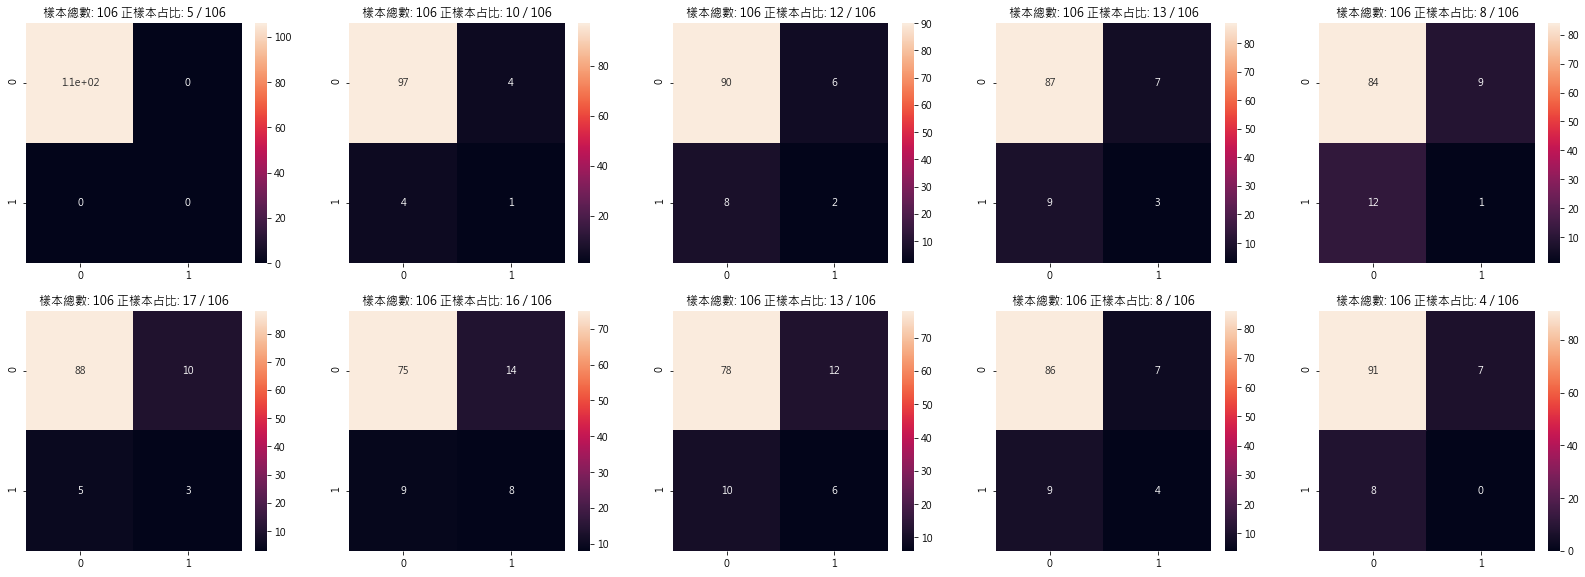

********************************************************************************************************************************************************************************************************************************************************** 

svr_lin
train svm with svr_lin
{'mse': 3.7830188679245285, 'mae': 1.5, 'r2_score': 0.3639968279143537}


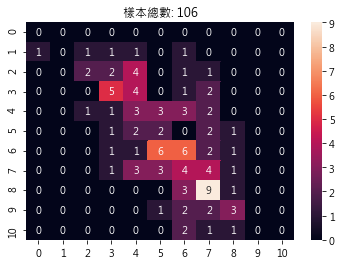

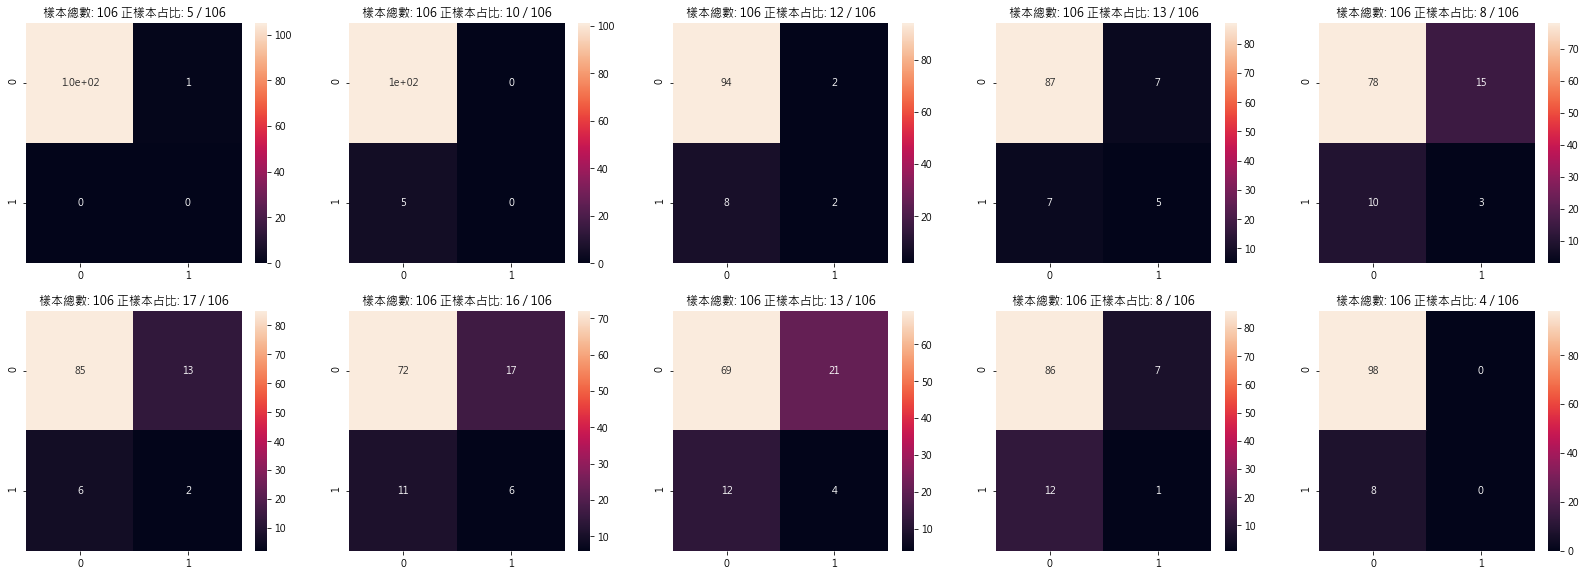

********************************************************************************************************************************************************************************************************************************************************** 



In [237]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor


def svm_grid_test(df, label):
    X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.33, random_state=40)

    svr_rbf = SVR(kernel='rbf', C=100, gamma='auto', epsilon=.1)
    svr_lin = SVR(kernel='linear', C=100, gamma='auto')
    svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, 
                   coef0=1, verbose = True)            # poly 跑很久 沒再動
    lis = []
    dic = {'svr_rbf':svr_rbf,
           'svr_lin':svr_lin #,
#           'svr_poly':svr_poly
          } 
    for i in list(dic.keys()):
        print(i)
        model = dic[i]
        y_train = np.array(y_train)
#         y_train = np.squeeze(y_train, axis = -1)
        
        print('train svm with '+i)
        model.fit(X_train, np.array(y_train))
        
       
        y_true = y_test
        y_pred = model.predict(X_test)
        # 類別預測，把數值做整數(四捨五入)
        y_pred = np.round(y_pred) 

        # eval metric
        eva_result = eva_metric(y_true, y_pred)
        print(eva_result)
#         print(np.shape(y_true), np.shape(y_pred))
        # 混淆矩陣
        confusion_matrix_eval(y_true, y_pred, 10)
        
        lis.append([i, eva_result])
        print("*"*250, '\n')
    return lis, dic

tmp = df_copy.copy()
y = tmp.pop('LEVEL')

# print(df_copy.info())
svm_res, svm_model = svm_grid_test(tmp, y)

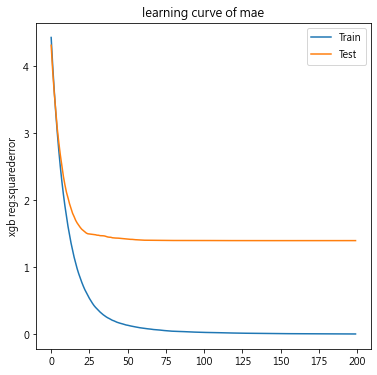

train, test 比例:  212 107
{'mse': 3.0841121495327104, 'mae': 1.4018691588785046, 'r2_score': 0.5313744226787704}


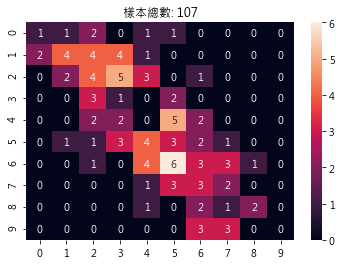

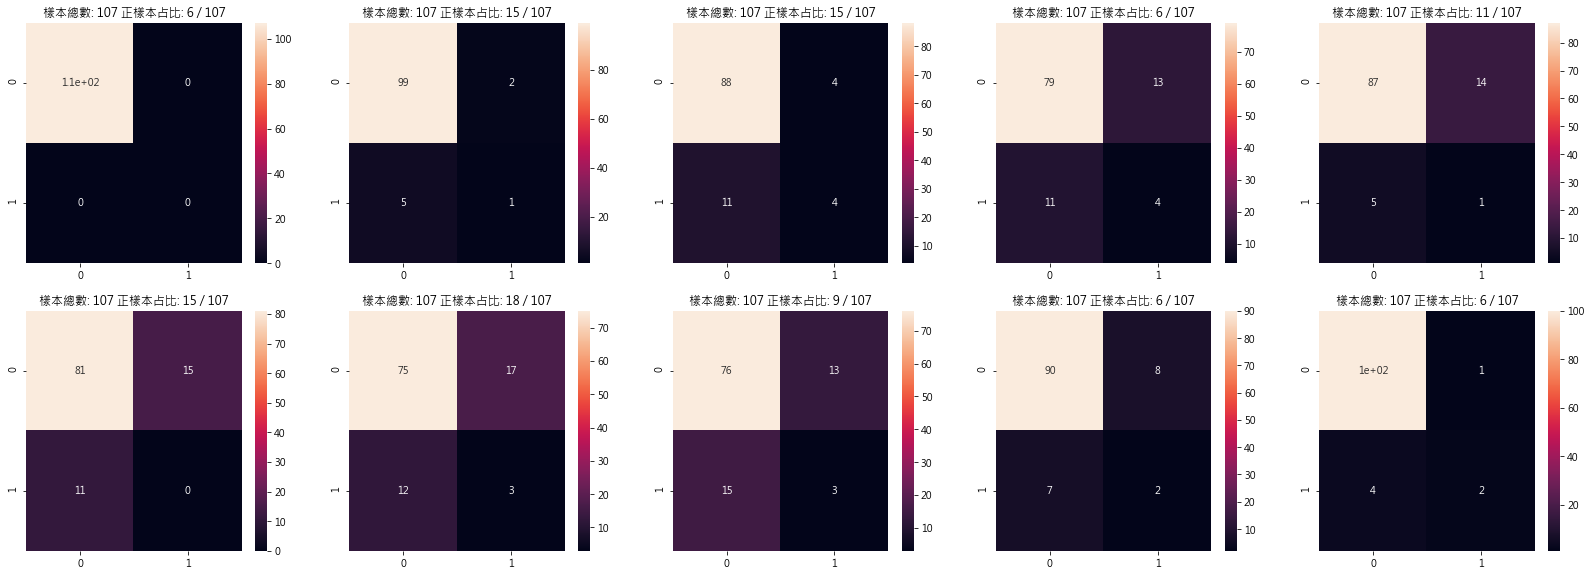

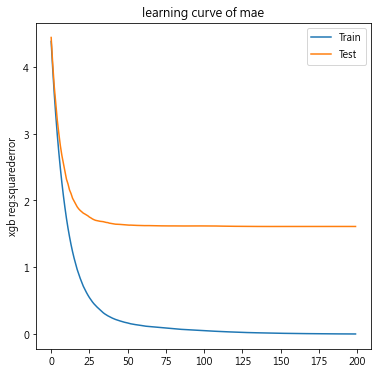

train, test 比例:  213 106
{'mse': 4.283018867924528, 'mae': 1.6037735849056605, 'r2_score': 0.20123489576417475}


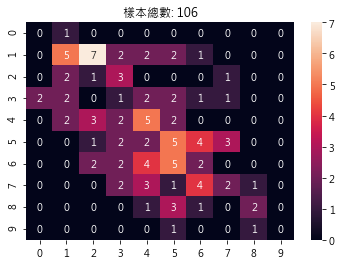

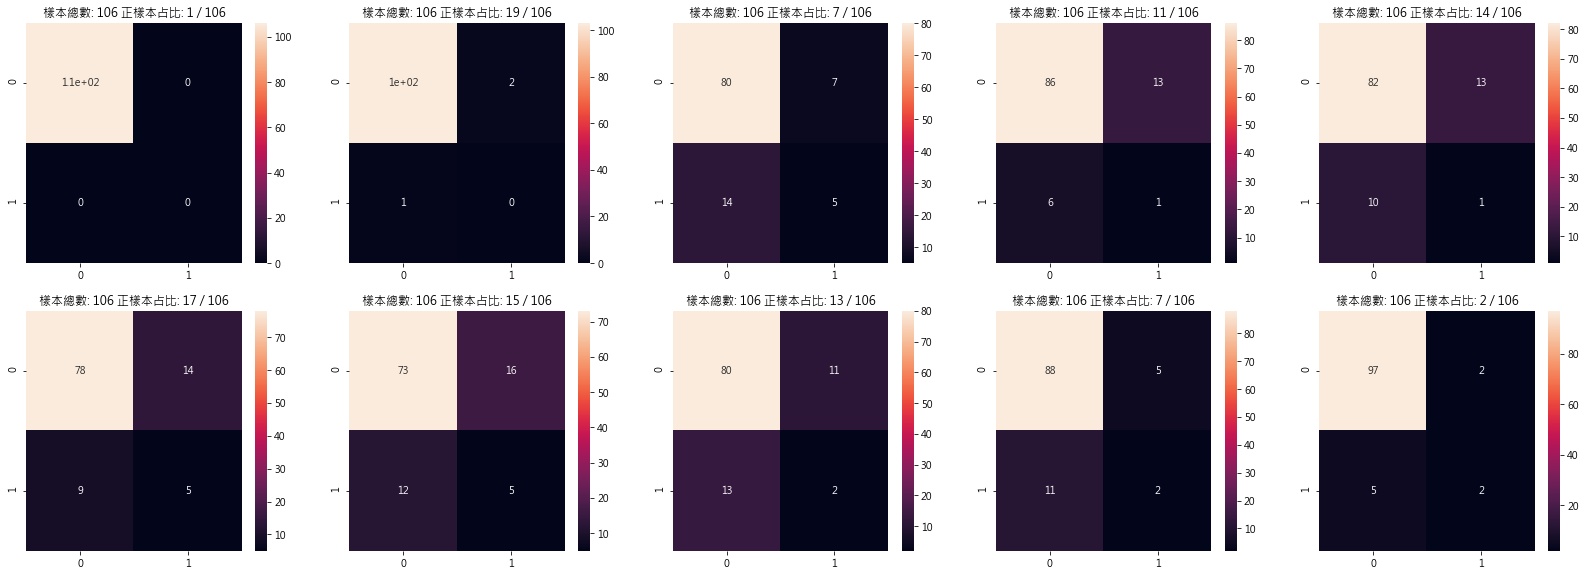

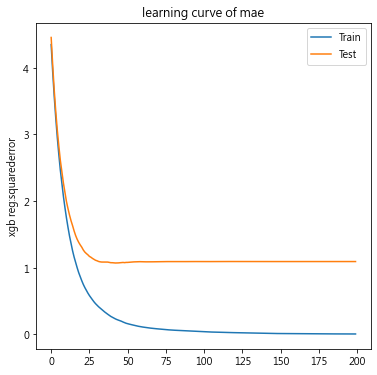

train, test 比例:  213 106
{'mse': 1.990566037735849, 'mae': 1.028301886792453, 'r2_score': 0.5986577662934252}


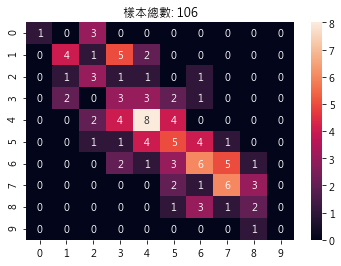

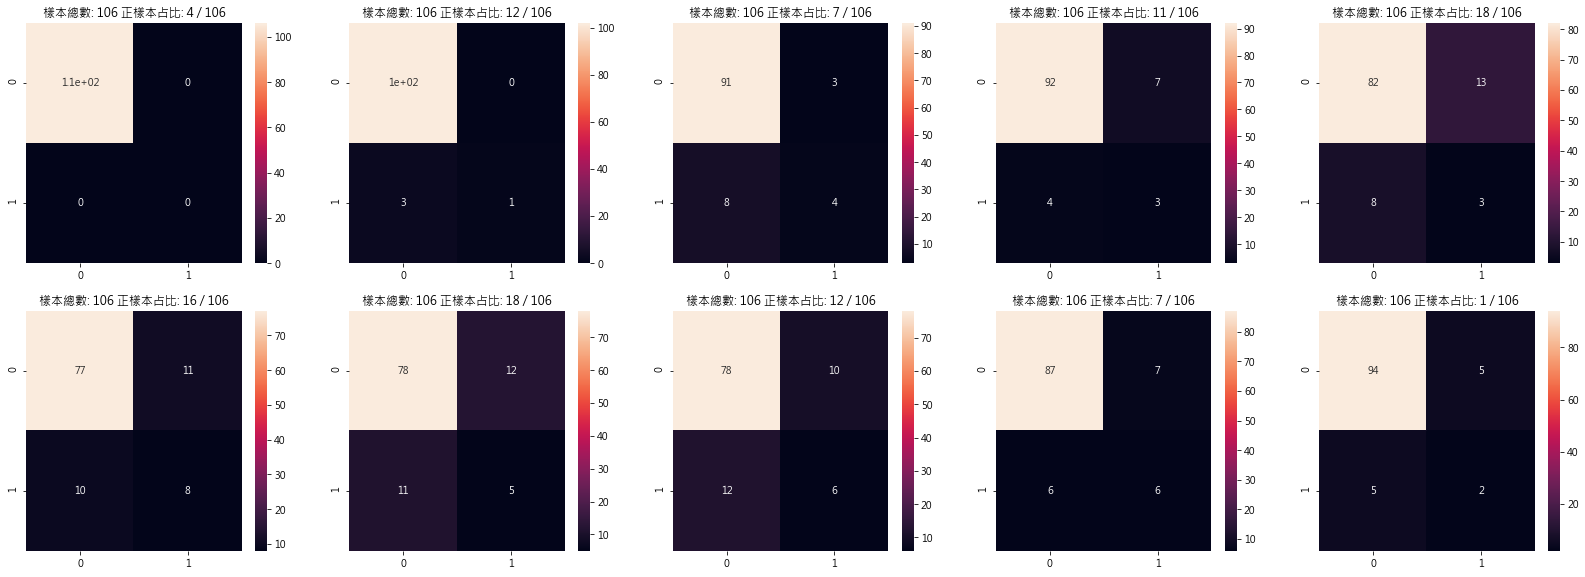

In [238]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np; np.random.seed(10)
from xgboost import XGBRegressor

X = df_copy.copy()
y = X.pop('LEVEL')

kf = KFold(n_splits = 3, shuffle = True)
# kf = StratifiedKFold(n_splits = 3, shuffle = True)
kf.get_n_splits(X) # just appear number of split


obj = 'reg:squarederror'
eval_m = 'mae'


for train_index, test_index in kf.split(X, y):
    
    X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    
    
    model = XGBRegressor(n_estimators = 200,
                         max_depth = 8,
                         objective = obj,
                         tree_method = 'gpu_hist',
                         scale_pos_weight = 5,
                         verbosity = 1)

    model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric=eval_m, 
              verbose = False)
#     print(model.evals_result())

    # plot 
    results = model.evals_result()
    lr_curve(results, 'xgb '+obj, 'learning curve of '+eval_m)
    
    
    # model predict and evaulate.
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    y_true = y_test
    print('train, test 比例: ', len(y_train), len(y_test))
    
    # eval metric
    eva_result = eva_metric(y_true, y_pred)
    print(eva_result)
    
    # 混淆矩陣
    confusion_matrix_eval(y_true, y_pred, 10)

    model.save_model('xgb.model')

In [239]:
# def svm_step_traininig(model, epochs, X_train, X_test, y_train, y_test):
#     model_dic = {'rbf'}
#     model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1, max_iter = 10)
    
#     for i in list(dic.keys()):
#         print(i)
#         model = dic[i]
#         y_train = np.array(y_train)
#     #         y_train = np.squeeze(y_train, axis = -1)

#         print('train svm with '+i)
#         model.fit(X_train, np.array(y_train))

#         y_true = y_test
#         y_pred = model.predict(X_test)
#         # 類別預測，把數值做整數(四捨五入)
#         y_pred = np.round(y_pred) 

In [240]:
test_filename = './data/test.csv'
df = pd.read_csv(test_filename)

In [241]:
import numpy as np
import pandas as pd
test_filename = './data/test.csv'
tmp = pd.read_csv(test_filename)
a = tmp['County'].unique()

train_filename = './data/train.csv'
tmp = pd.read_csv(train_filename)
b = tmp['County'].unique()

mask = np.in1d(a, b)
a[np.invert(mask)]

array(['花蓮縣壽豐鄉鹽寮村', '花蓮縣豐濱鄉東興村', '彰化縣大城鄉', '彰化線芳苑', '苗栗縣後龍鎮', '新竹市北區',
       '基隆中山區', '台東縣卑南鄉', '屏東枋寮', '高雄林園', '高雄彌陀區', '台南市北門區', '台東縣長濱鄉樟原村'],
      dtype=object)

In [242]:
import numpy as np
import pandas as pd

col = 'Station'

test_filename = './data/test.csv'
tmp = pd.read_csv(test_filename)
a = tmp[col].unique()

train_filename = './data/train.csv'
tmp = pd.read_csv(train_filename)
b = tmp[col].unique()

mask = np.in1d(a, b)
a[np.invert(mask)]

array(['E01', 'E04', 'E07', 'HL01', 'HL04', 'HL07', 'HL10', 'LI10', 'M03',
       'M06', 'M09', 'M12', 'M15', 'M18', 'M21', 'M24', 'N03', 'N06',
       'N09', 'N12', 'N15', 'N18', 'N21', 'N24', 'SE05', 'SE08', 'SE11',
       'SE14', 'SE17', 'SE20', 'SE23', 'SW02', 'SW05', 'SW08', 'SW11',
       'SW14', 'SW17', 'SW20', 'SW23', 'TT01', 'TT04'], dtype=object)

In [243]:
tmp = pd.read_csv('data/submission.csv')
tmp

,ID,LEVEL
0,E01_1,NaN
1,E01_2,NaN
2,E01_3,NaN
3,E01_4,NaN
4,E04_1,NaN
...,...,...
158,TT01_4,NaN
159,TT04_1,NaN
160,TT04_2,NaN
161,TT04_3,NaN


## 把地理因素補起來

In [244]:
df_copy = df.copy()
nan_col = df_copy.columns[df_copy.isna().any()]

lis = df_copy['Station'].unique()
print(lis)
for i in lis:
    cond = df_copy['Station'] == i
    
    df_copy.loc[cond, nan_col] = df_copy.loc[cond, nan_col].fillna(0, axis = 0)
    df_copy.loc[cond, nan_col] = df_copy.loc[cond, nan_col].mode().values[0]


['E01' 'E04' 'E07' 'HL01' 'HL04' 'HL07' 'HL10' 'LI10' 'M03' 'M06' 'M09'
 'M12' 'M15' 'M18' 'M21' 'M24' 'N03' 'N06' 'N09' 'N12' 'N15' 'N18' 'N21'
 'N24' 'SE05' 'SE08' 'SE11' 'SE14' 'SE17' 'SE20' 'SE23' 'SW02' 'SW05'
 'SW08' 'SW11' 'SW14' 'SW17' 'SW20' 'SW23' 'TT01' 'TT04']


# 做submmision

In [245]:
df_copy.pop('County')
df_copy.pop('Station')
df_copy.pop('Location')

0       石城
1       石城
2       石城
3       石城
4       永鎮
      ... 
158    八仙北
159    石雨傘
160    石雨傘
161    石雨傘
162    石雨傘
Name: Location, Length: 163, dtype: object

In [254]:
list(svm_model.keys())

['svr_rbf', 'svr_lin']

In [246]:
list(svm_model.keys())
result = dict()
for i in list(svm_model.keys()):
    y_pred = svm_model[i].predict(df_copy)
    y_pred = np.round(y_pred).astype(int)
    result[i] = y_pred
#     print(y_pred)
    tmp = pd.read_csv('data/submission.csv')
    tmp.loc[:, 'LEVEL'] = y_pred
    tmp.to_csv('./sub/'+i+'.csv', index = False)
    
#     print(i)

In [247]:
xgb = XGBRegressor()
xgb.load_model('./xgb.h5')

In [248]:
xgb_y_pred = xgb.predict(df_copy)
xgb_y_pred = np.round(y_pred).astype(int)

In [255]:
tmp = pd.read_csv('data/submission.csv')
tmp.loc[:, 'LEVEL'] = xgb_y_pred
tmp.to_csv('./sub/xgb.csv', index = False)

In [249]:
lis = list(result.keys())

a = result[lis[0]]
b = result[lis[1]]
xgb_y_pred = xgb_y_pred

mask = np.in1d(b, xgb_y_pred)
cond = np.invert(mask)
# a[np.invert(mask)]
np.where(cond)
print(np.where(cond))
print(b[cond])

(array([], dtype=int64),)
[]


In [250]:
b

array([ 3,  6,  6,  5,  5,  6,  5,  3,  4,  3,  3,  3,  3,  1,  3,  2,  3,
        4,  3,  5,  3,  3,  2,  2,  5,  4,  5,  3,  5,  6,  2,  6,  7,  5,
        6,  6,  7,  8,  7,  5,  5,  5,  6,  5,  7,  6,  5,  5,  6,  6,  7,
        4,  4,  5,  7,  7,  5,  7,  6,  6,  6,  5,  6,  6,  5,  4,  2,  7,
        5,  5,  6, 10, 10, 10,  8,  5,  4,  4,  2,  8,  6,  8,  7,  6,  7,
        4,  7,  7,  6,  6,  6,  7,  7,  7,  6,  7,  2,  3,  2,  5,  2,  5,
        3,  5,  2,  3,  2,  3,  3,  3,  3,  6,  7,  7,  5,  5,  7,  6,  7,
        7,  7,  7,  5,  5,  8,  6,  7,  6,  6,  6,  5,  7,  5,  5,  6,  5,
        5,  3,  3,  6,  5,  7,  5,  6,  7,  5,  6,  8, 10,  8,  8,  7,  7,
        7,  4,  4,  1,  5,  1,  8,  5,  6,  8])

In [253]:
lis = [a, b, xgb_y_pred]

for i in range(len(lis)):
    for ii in range(i+1, len(lis)):
        mask = np.in1d(lis[i], lis[ii])
        cond = np.invert(mask)
        print(i, ii)
        print(np.where(cond))
        print(lis[i][cond])
        print(lis[ii][cond])


0 1
(array([  5,  39,  79,  86,  94, 147, 152, 153]),)
[9 9 9 9 9 9 9 9]
[6 5 8 7 6 8 7 7]
0 2
(array([  5,  39,  79,  86,  94, 147, 152, 153]),)
[9 9 9 9 9 9 9 9]
[6 5 8 7 6 8 7 7]
1 2
(array([], dtype=int64),)
[]
[]
